In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\Jyothi Nair\Desktop\AI-ML\Datasets\new_insurance_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [7]:
data.shape

(1338, 13)

In [8]:
data.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [11]:
data.describe

<bound method NDFrame.describe of        age     sex     bmi  children smoker  Claim_Amount  past_consultations  \
0     18.0    male  23.210       0.0     no   29087.54313                17.0   
1     18.0    male  30.140       0.0     no   39053.67437                 7.0   
2     18.0    male  33.330       0.0     no   39023.62759                19.0   
3     18.0    male  33.660       0.0     no   28185.39332                11.0   
4     18.0    male  34.100       0.0     no   14697.85941                16.0   
...    ...     ...     ...       ...    ...           ...                 ...   
1333  33.0  female  35.530       0.0    yes   63142.25346                32.0   
1334  31.0  female  38.095       1.0    yes   43419.95227                31.0   
1335  52.0    male  34.485       3.0    yes   52458.92353                25.0   
1336  45.0    male  30.360       0.0    yes   69927.51664                34.0   
1337  54.0  female  47.410       0.0    yes   63982.80926                31

In [12]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [19]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [23]:
col = list(data.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

Imputation of data - if the missing data has an object data type, we replace is with the mode of the column. Otherwise, it is replaced with the mean of the column.

In [24]:
for col_name in col:
    if data[col_name].dtypes == 'object':
        data[col_name] = data[col_name].fillna(data[col_name].mode()[0])
    else:
        data[col_name] = data[col_name].fillna(data[col_name].mean())


In [35]:
data.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

As we can see, the data now has no null values in any column.

<AxesSubplot:xlabel='age', ylabel='Anual_Salary'>

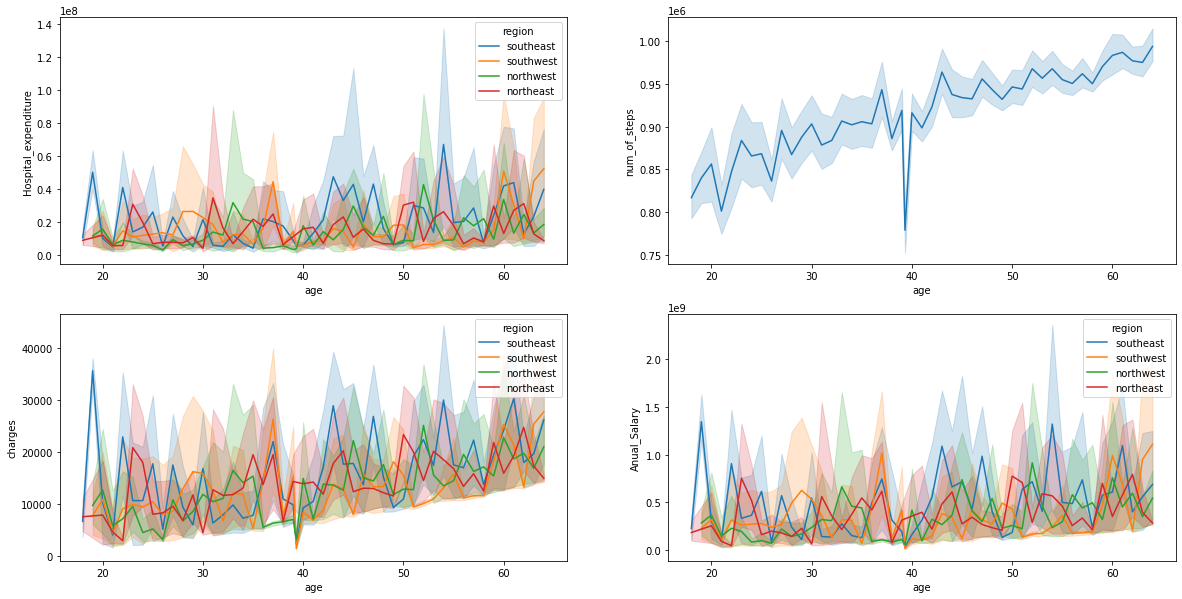

In [47]:
fig, axes = plt.subplots(2,2, figsize =(20,10))

plt.subplot(2,2,1)
sns.lineplot(x=data['age'], y=data['Hospital_expenditure'], hue=data['region'], data=data)

plt.subplot(2,2,2)
sns.lineplot(x=data['age'], y=data['num_of_steps'], data=data)

plt.subplot(2,2,3)
sns.lineplot(x=data['age'], y=data['charges'], hue=data['region'], data=data)

plt.subplot(2,2,4)
sns.lineplot(x=data['age'], y=data['Anual_Salary'], hue=data['region'], data=data)

Detecting outliers in the columns:

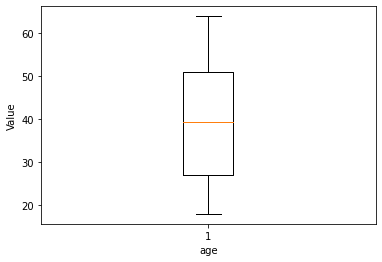

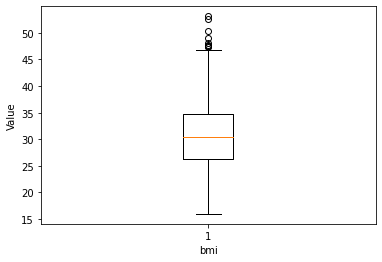

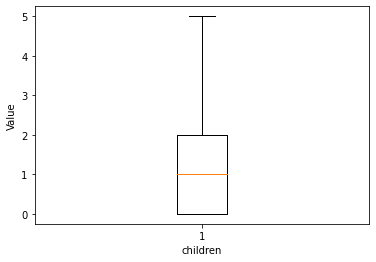

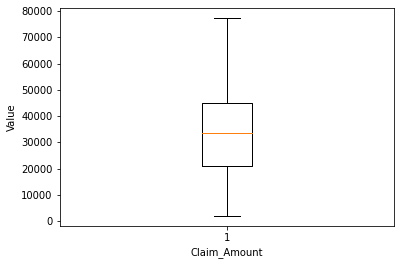

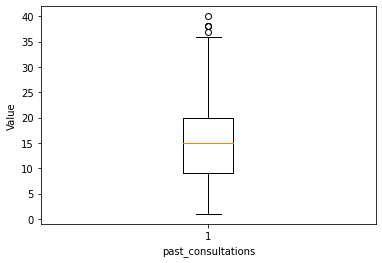

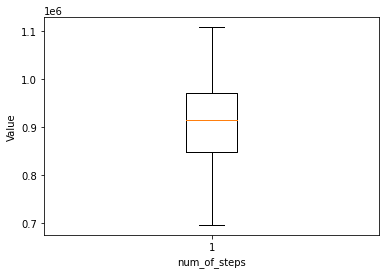

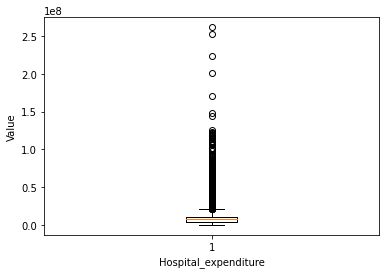

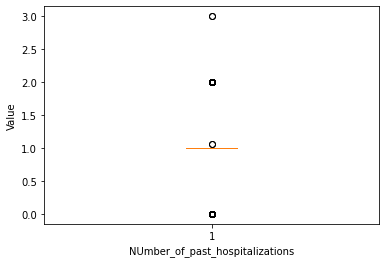

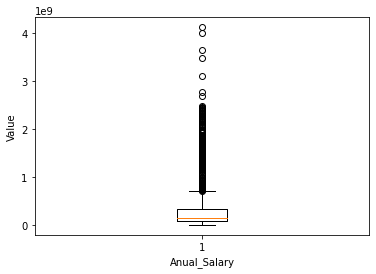

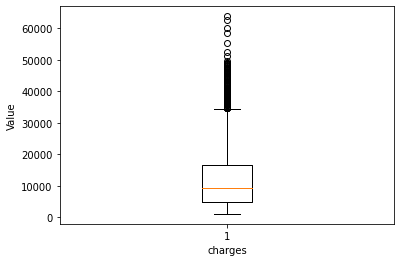

In [49]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('Value')
        plt.show()

As we can see from the boxplots above, 'charges', 'Anual_salary', 'hospital_expenditure','past_consultations', and 'bmi' columns have outliers that need to be eliminated from the dataset.

In [50]:
q1 = data.charges.quantile(0.25)
q3 = data.charges.quantile(0.75)
iqr = q3-q1
print(iqr)
#Lower limit = q1- 1.5*iqr
#Upper limit = q3 + 1.5*iqr


11899.625365


Eliminating outliers from the 6 aforementioned columns of the dataset. This is done by including values greater than the lower limit and lower than the upper limit.

In [51]:
q1 = data.charges.quantile(0.25)
q3 = data.charges.quantile(0.75)
iqr = q3-q1
data = data[(data.charges >= q1 - 1.5*iqr) & (data.charges <= q3 + 1.5*iqr)]

q1 = data.Anual_Salary.quantile(0.25)
q3 = data.Anual_Salary.quantile(0.75)
iqr = q3-q1
data = data[(data.Anual_Salary >= q1 - 1.5*iqr) & (data.Anual_Salary <=q3 + 1.5*iqr)]

q1 = data.Hospital_expenditure.quantile(0.25)
q3 = data.Hospital_expenditure.quantile(0.75)
iqr = q3-q1
data = data[(data.Hospital_expenditure >= q1 - 1.5*iqr) & (data.Hospital_expenditure <= q3 +1.5*iqr)]

q1 = data.past_consultations.quantile(0.25)
q3 = data.past_consultations.quantile(0.75)
iqr = q3-q1
data = data[(data.past_consultations >= q1 -1.5*iqr) & (data.past_consultations <= q3 + 1.5*iqr)]

q1 = data.bmi.quantile(0.25)
q3 = data.bmi.quantile(0.75)
iqr = q3 - q1
data= data[(data.bmi >= q1- 1.5*iqr) & (data.bmi <= q3 + 1.5*iqr)]

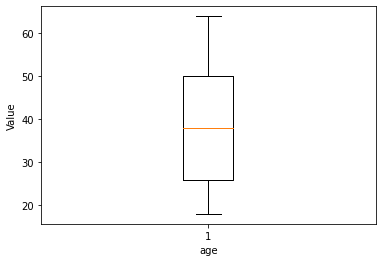

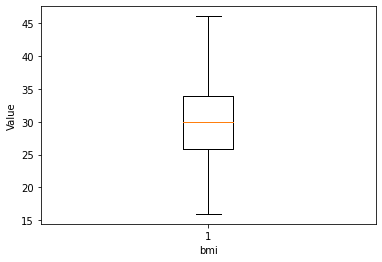

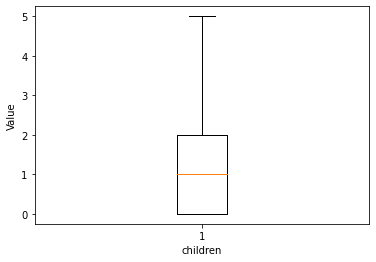

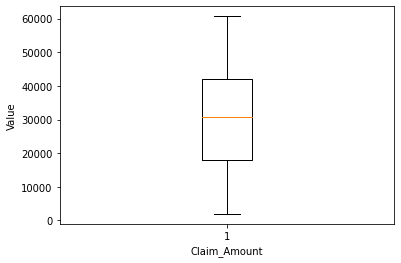

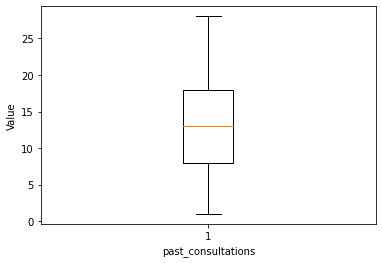

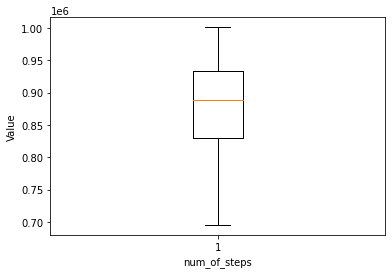

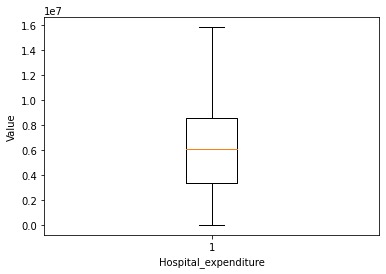

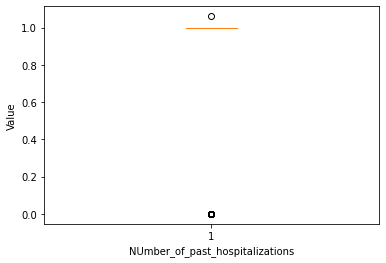

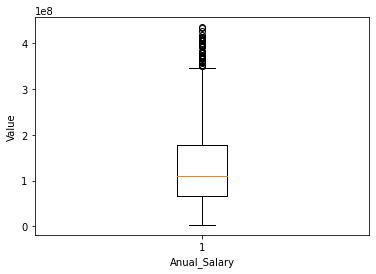

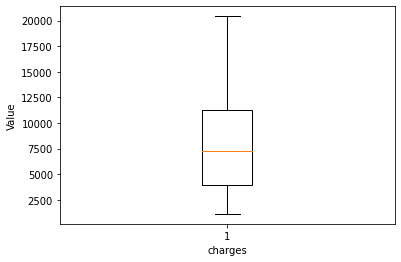

In [52]:
for col_name in col:
    if(data[col_name].dtype == 'int64' or data[col_name].dtype == 'float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('Value')
        plt.show()

As we can see, the values in the dataset have been brough down to acceptable levels.

In [53]:
corr = data.corr()


<AxesSubplot:>

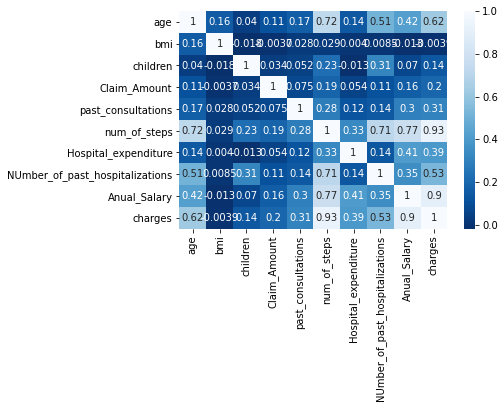

In [63]:
sns.heatmap(corr, cmap = 'Blues_r', annot=True)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
#Append numeric values onto the list except for charges, which is the dependent variable.
col_list = []
for col in data.columns:
    if((data[col].dtype != 'object') & (col != 'charges')):
        col_list.append(col)
print(col_list)

['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary']


In [73]:
X = data[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1060,32.0,28.930,1.0,27709.20483,26.0,988726.0,1.572778e+07,1.0,4.067092e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08
1066,39.0,26.410,0.0,30912.36385,26.0,982355.0,1.113581e+07,1.0,4.276393e+08
1069,35.0,28.025,0.0,17200.14586,15.0,993979.0,1.247744e+07,1.0,3.696849e+08


In [75]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.535631
1                              bmi  27.072791
2                         children   2.026184
3                     Claim_Amount   5.693585
4               past_consultations   6.361431
5                     num_of_steps  63.523392
6             Hospital_expenditure   5.385929
7  NUmber_of_past_hospitalizations  12.227762
8                     Anual_Salary   5.050040


As we can see above, 'num_of_steps', 'bmi', 'age', 'number_of_past_hospitalizations' have very high VIF and therefore need to be dropped to reduce multicollinearity.

In [76]:
data = data.drop(['num_of_steps'], axis=1)
data = data.drop(['bmi'], axis=1)
data = data.drop(['age'], axis=1)
data = data.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [85]:
col_list = []
for col in data.columns:
    if((data[col].dtype != 'object') & (col != 'charges')):
        col_list.append(col)
X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.706506
1          Claim_Amount  4.080685
2    past_consultations  4.759365
3  Hospital_expenditure  4.457841
4          Anual_Salary  4.202463


The VIF values of the existing columns have also been reduced as a result, and the data is now ready to be used with the linear regression model.

In [87]:
x = data.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']] #Independent columns
y = data.iloc[:, -1] #Charges, the resultant or dependent column
print(x)
print(y)

      children  Claim_Amount  past_consultations  Hospital_expenditure  \
0          0.0   29087.54313                17.0          4.720921e+06   
1          0.0   39053.67437                 7.0          4.329832e+06   
2          0.0   39023.62759                19.0          6.884861e+06   
3          0.0   28185.39332                11.0          4.274774e+06   
4          0.0   14697.85941                16.0          3.787294e+06   
...        ...           ...                 ...                   ...   
1060       1.0   27709.20483                26.0          1.572778e+07   
1062       2.0   21596.43846                10.0          1.083030e+07   
1066       0.0   30912.36385                26.0          1.113581e+07   
1069       0.0   17200.14586                15.0          1.247744e+07   
1072       0.0   35897.21511                27.0          1.239542e+07   

      Anual_Salary  
0     5.578497e+07  
1     1.370089e+07  
2     7.352311e+07  
3     7.581968e+07  
4     

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=0)

Training and builting the Linear Regression model:

In [90]:
da_model = LinearRegression()
da_model.fit(x_train, y_train)
prediction = da_model.predict(x_test) #Testing the model by using 'x_test' as an input
print(prediction)

[ 3446.22295642 20278.85661717 11908.02326822 10763.97561991
  3383.41309607  7394.41462746  5251.46168699 19285.07075096
  3079.02699404 18488.21750669  6860.28221926  5003.18919597
  6113.7282076   8354.31888355  8333.66185746  3458.74157125
 11110.8772326  12627.25526627  3304.85647956 12292.26637471
  4878.74736455  8410.58699213  3970.79962344  6335.56060602
 10420.43196299  2090.01402463  7618.88202479  1719.64554634
 12191.00323513  2877.22918608  4766.36172253  3528.52382545
  8226.90712297  8357.73428877  9662.39798565  6707.47458327
  9990.07212185 11888.06645428 18063.01767408  3230.91268376
  6190.36771737  7306.52097466  3473.60408546 17105.23460438
  8677.52671637  7213.38265928  4066.81967132  4922.82155279
  6770.63801612  8656.3145122   7680.13516271  6711.20050856
 10049.46984439 20314.47315944  6638.24297464  6470.01503423
  3236.93947811  1917.60428724  6608.92717842  4624.45557936
  2873.44944444  3754.37513574  7586.59214042  7297.91192042
 12343.80403276  9995.96

In [94]:
error_pred = pd.DataFrame(columns={'Actual_Data', 'Prediction_Data'})
error_pred['Actual_Data'] = y_test
error_pred['Prediction_Data'] = prediction
error_pred['Error'] = error_pred['Actual_Data'] - error_pred['Prediction_Data']
error_pred

,Actual_Data,Prediction_Data,Error
250,3761.29200,3446.222956,315.069044
1025,18033.96790,20278.856617,-2244.888717
774,11033.66170,11908.023268,-874.361568
903,13012.20865,10763.975620,2248.233030
98,2102.26470,3383.413096,-1281.148396
...,...,...,...
1058,19594.80965,21006.102474,-1411.292824
193,3046.06200,5252.143491,-2206.081491
286,4243.59005,4245.554215,-1.964165
708,9910.35985,9906.240323,4.119527


In [95]:
from sklearn.metrics import *

In [96]:
r2_test = r2_score(y_test, prediction)
r2_test

0.77895548667994

Therefore, the Linear Regression model has a coefficient of determination of 0.7789. This means that 77.89% of the dependent variable's variation is explained by the independent variables.